<a href="https://colab.research.google.com/github/antalvort/Mi-portfolio/blob/main/datos-bursatiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import requests
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# yfinance para datos bursatiles

In [225]:
tesla=yf.Ticker('TSLA')

In [226]:
tesla_data=tesla.history(period='max')

In [227]:
tesla_data.reset_index(inplace=True)

In [228]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Webscraping para datos ingresos

In [229]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [230]:
data=pd.read_html(url)

In [231]:
data=data[1]

In [232]:
data.columns=['date','revenues']


In [234]:
data.tail()

,date,revenues
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


In [235]:
data['revenues'] = data['revenues'].replace('NaN', np.nan)
data['revenues'] = data['revenues'].str.replace('[\$,]', '', regex=True).astype(float)
data['revenues'] = data['revenues'].fillna(0).astype(int)

In [236]:
data['date']=data['date'].iloc[::-1].reset_index(drop=True)
data['revenues']=data['revenues'].iloc[::-1].reset_index(drop=True)

# yfinance para datos bursatiles GME

In [237]:
gme=yf.Ticker('GME')

In [238]:
gme_data=gme.history(period='max')

In [239]:
gme_data.reset_index(inplace=True)

In [240]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Webscraping para datos ingresos GME

In [241]:
url2='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [242]:
data2=pd.read_html(url2)

In [243]:
data2=data2[1]


In [244]:
data2

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [245]:
data2.columns=['date','revenues']

In [246]:
data2.tail()

,date,revenues
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [247]:
data2['revenues'] = data2['revenues'].replace('NaN', np.nan)
data2['revenues'] = data2['revenues'].str.replace('[\$,]', '', regex=True).astype(float)
data2['revenues'] = data2['revenues'].fillna(0).astype(int)

In [248]:
data2['date']=data2['date'].iloc[::-1].reset_index(drop=True)
data2['revenues']=data2['revenues'].iloc[::-1].reset_index(drop=True)

# Graficas Tesla

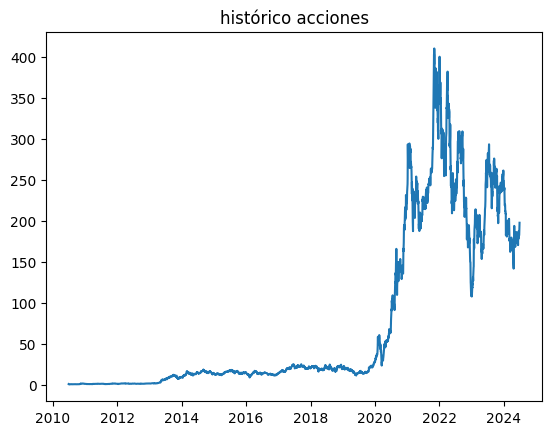

In [249]:
plt.title('histórico acciones')
x=tesla_data['Date']
y=tesla_data['Close']
acciones_tesla=plt.plot(x,y)


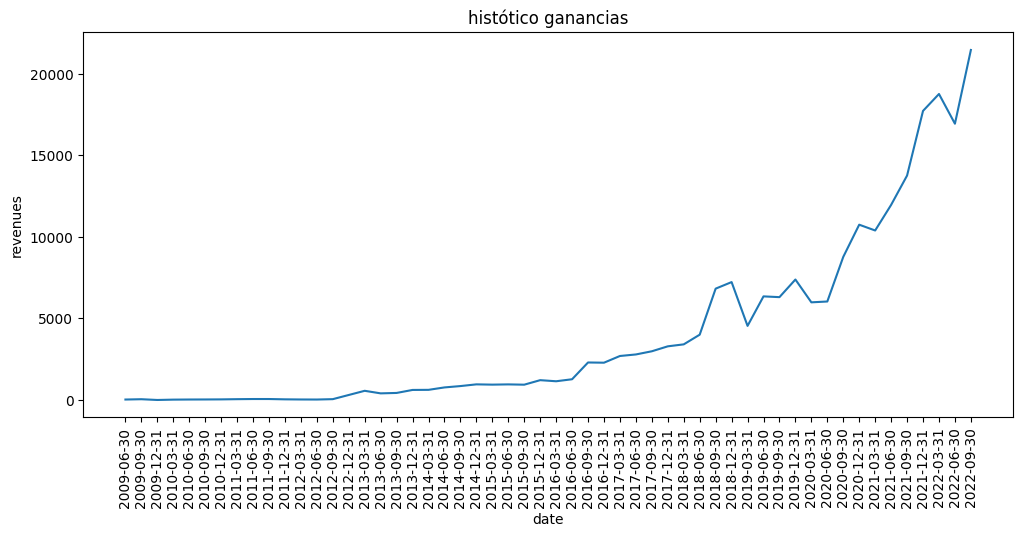

In [250]:
plt.figure(figsize=(12,5))
plt.title('histótico ganancias')
plt.xlabel('date')
plt.ylabel('revenues')
plt.xticks(rotation=90)

x1=data['date']
y1=data['revenues']
plt.plot(x1,y1)

# Graficas GameStop

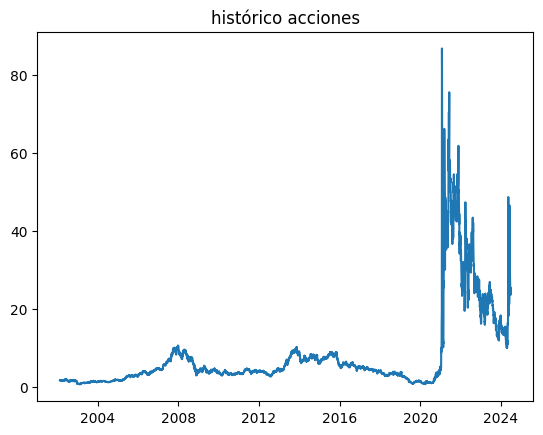

In [251]:
plt.title('histórico acciones')
x=gme_data['Date']
y=gme_data['Close']
acciones_gme=plt.plot(x,y)


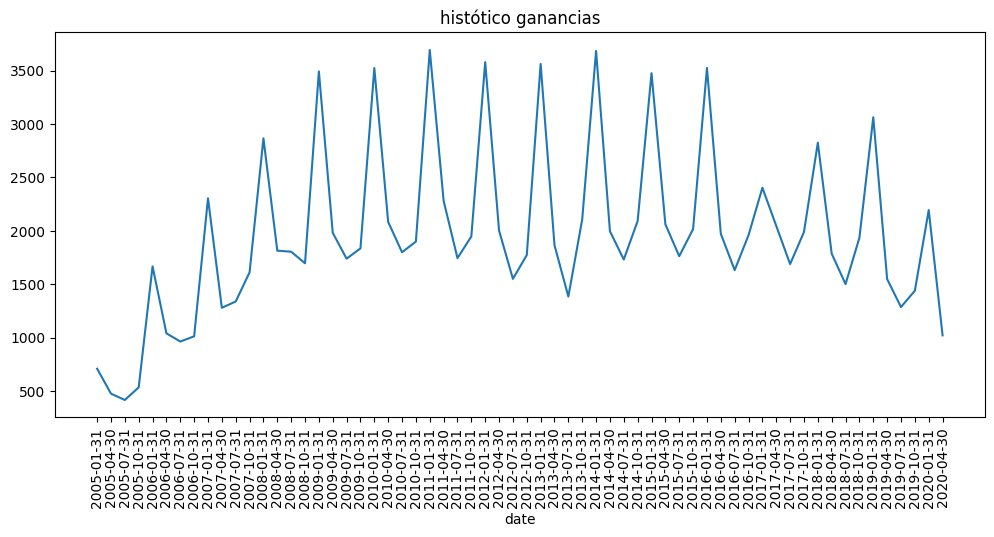

In [252]:
plt.figure(figsize=(12,5))
plt.title('histótico ganancias')
plt.xlabel('date')
plt.xticks(rotation=90)
x1=data2['date']
y1=data2['revenues']
plt.plot(x1,y1)